## Pilih wilayah yang akan di ambil data NO2

Wilayah yang akan di ambil data NO2 nya yaitu sebagian dari Kabupaten Sidoarjo

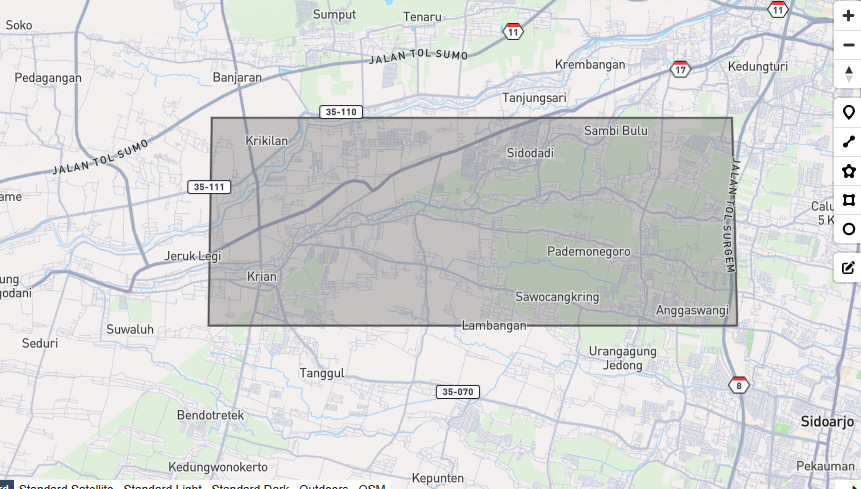

dengan koordinat :


[112.56542968039685,
-7.3710676060699285],

[112.56542968039685,
-7.4227822432267345],

[112.6962889351795,
-7.4227822432267345],

[112.6962889351795,
-7.3710676060699285],

[112.56542968039685,
-7.3710676060699285]

- west: 112.56542968039685,
- south: -7.4227822432267345,
- east:  112.6962889351795,
- north: -7.3710676060699285


## **Pengumpulan Data**

Pengumpulan data dikumpulkan merupakan data NO2 yang didapatkan dengan cara crawling dari website https://documentation.dataspace.copernicus.eu/notebook-samples/openeo/NO2Covid.html

In [1]:
pip install xarray pandas openeo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.1/335.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.7/207.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 2.0.0
    Uninstalling wrapt-2.0.0:
      Successfully uninstalled wrapt-2.0.0
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.10.1
    Uninstalling xarray-2025.10.1:
      Successfully uninstalled xarray-2025.10.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import openeo
import pandas as pd
import matplotlib.pyplot as plt

- Setelah itu masukkan kode ini

In [5]:
import openeo
import pandas as pd
import matplotlib.pyplot as plt

# 1. Koneksi ke Copernicus Data Space
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

# 2. AOI: poligon kedua dari data kamu
aoi = {
    "type": "Polygon",
    "coordinates": [
      [
            [
              112.56542968039685,
              -7.3710676060699285
            ],
            [
              112.56542968039685,
              -7.4227822432267345
            ],
            [
              112.6962889351795,
              -7.4227822432267345
            ],
            [
              112.6962889351795,
              -7.3710676060699285
            ],
            [
              112.56542968039685,
              -7.3710676060699285
            ]
          ]
    ],
}

# 3. Ambil data Sentinel-5P (band "NO2")
s5p = connection.load_collection(
    "SENTINEL_5P_L2",
    spatial_extent={
        "west": 112.56542968039685,
        "south": -7.4227822432267345,
        "east":  112.6962889351795,
        "north": -7.3710676060699285,
    },
    temporal_extent=["2024-09-01", "2025-09-30"],
    bands=["NO2"],
)

# 4. Mask nilai negatif (data invalid)
def mask_invalid(x):
    return x < 0

s5p_masked = s5p.mask(s5p.apply(mask_invalid))

# 5. Agregasi temporal harian
daily_mean = s5p_masked.aggregate_temporal_period(period="day", reducer="mean")

# 6. Agregasi spasial (rata-rata dalam AOI)
daily_mean_aoi = daily_mean.aggregate_spatial(geometries=aoi, reducer="mean")

# 7. Jalankan batch job dan hasilkan file CSV
job = daily_mean_aoi.execute_batch(out_format="CSV")

# 8. Unduh hasil job
results = job.get_results()
results.download_files("no2_results")

# 9. Baca file CSV hasil
import os
for f in os.listdir("no2_results"):
    if f.endswith(".csv"):
        df = pd.read_csv(os.path.join("no2_results", f))
        print("File ditemukan:", f)
        break

# 10. Pastikan kolom tanggal benar
df["date"] = pd.to_datetime(df["date"])

# 11. Buat kolom bulan (YYYY-MM)
df["month"] = df["date"].dt.to_period("M")

# 12. Hitung rata-rata NO2 per bulan
df_monthly = df.groupby("month", as_index=False)["NO2"].mean()

# 13. Visualisasi hasil


Authenticated using refresh token.
0:00:00 Job 'j-2510251135304f429c4d5ed6cd7b5664': send 'start'
0:00:13 Job 'j-2510251135304f429c4d5ed6cd7b5664': created (progress 0%)
0:00:18 Job 'j-2510251135304f429c4d5ed6cd7b5664': created (progress 0%)
0:00:24 Job 'j-2510251135304f429c4d5ed6cd7b5664': created (progress 0%)
0:00:32 Job 'j-2510251135304f429c4d5ed6cd7b5664': created (progress 0%)
0:00:42 Job 'j-2510251135304f429c4d5ed6cd7b5664': running (progress N/A)
0:00:55 Job 'j-2510251135304f429c4d5ed6cd7b5664': running (progress N/A)
0:01:10 Job 'j-2510251135304f429c4d5ed6cd7b5664': running (progress N/A)
0:01:29 Job 'j-2510251135304f429c4d5ed6cd7b5664': running (progress N/A)
0:01:53 Job 'j-2510251135304f429c4d5ed6cd7b5664': running (progress N/A)
0:02:23 Job 'j-2510251135304f429c4d5ed6cd7b5664': running (progress N/A)
0:03:01 Job 'j-2510251135304f429c4d5ed6cd7b5664': running (progress N/A)
0:03:48 Job 'j-2510251135304f429c4d5ed6cd7b5664': running (progress N/A)
0:04:46 Job 'j-2510251135304f4

/tmp/ipython-input-2327664133.py:81: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["date"].dt.to_period("M")


### Baca Dataset

In [9]:
new_df = pd.read_csv('no2_results/timeseries.csv')
new_df = new_df.sort_values(by='date').reset_index(drop=True)
new_df['date'] = pd.to_datetime(new_df['date']).dt.date
new_df

,date,feature_index,NO2
0,2024-08-31,0,NaN
1,2024-09-01,0,0.000045
2,2024-09-02,0,0.000038
3,2024-09-03,0,0.000050
4,2024-09-04,0,0.000033
...,...,...,...
390,2025-09-25,0,0.000054
391,2025-09-26,0,0.000047
392,2025-09-27,0,0.000045
393,2025-09-28,0,0.000024


### Deteksi Missing Value dari Dataset


In [10]:
missing_count = new_df.isnull().sum()
missing_percent = (missing_count / len(new_df)) * 100

missing_table = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent (%)': missing_percent.round(2)
})

missing_table

,Missing Count,Missing Percent (%)
date,0,0.00
feature_index,0,0.00
NO2,209,52.91


### Visualisasi Dataset


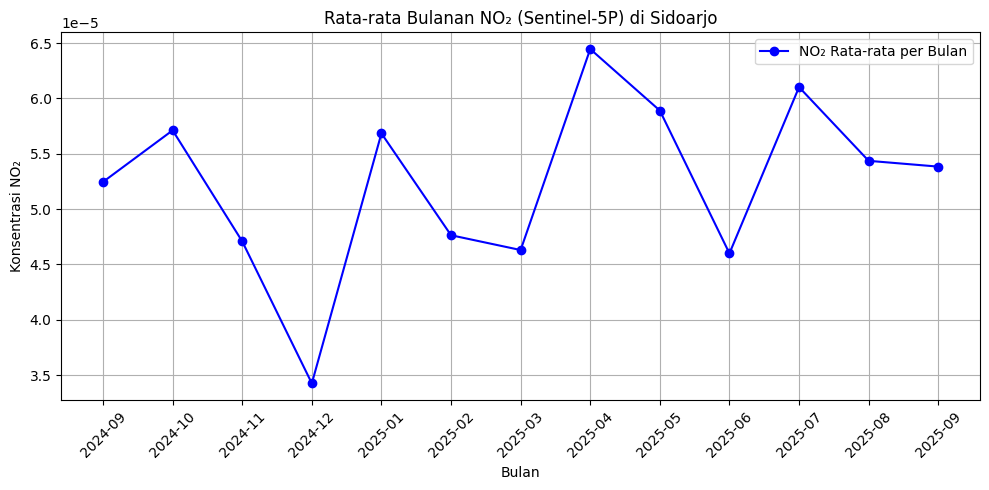

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df_monthly["month"].astype(str), df_monthly["NO2"], marker="o", color="blue", label="NO₂ Rata-rata per Bulan")
plt.title("Rata-rata Bulanan NO₂ (Sentinel-5P) di Sidoarjo")
plt.xlabel("Bulan")
plt.ylabel("Konsentrasi NO₂")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Tangani Missing Value dengan Interpolasi





In [13]:
new_df = pd.Series(new_df['NO2'].values, index=new_df['date'], name='NO2')
new_df = new_df.interpolate(method='linear').bfill()
new_df = pd.DataFrame(new_df).reset_index()
new_df.to_csv("no2_results/timeseries.csv")
new_df

,date,NO2
0,2024-08-31,0.000045
1,2024-09-01,0.000045
2,2024-09-02,0.000038
3,2024-09-03,0.000050
4,2024-09-04,0.000033
...,...,...
390,2025-09-25,0.000054
391,2025-09-26,0.000047
392,2025-09-27,0.000045
393,2025-09-28,0.000024


### Deteksi Ulang Missing Value

In [14]:
missing_count = new_df.isnull().sum()
missing_percent = (missing_count / len(new_df)) * 100

missing_table = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent (%)': missing_percent.round(2)
})

missing_table

,Missing Count,Missing Percent (%)
date,0,0.0
NO2,0,0.0
